# **Project Name - AirBnb Booking Analysis**

# **Contribution**

Individual - Prabhat Rajput

# **Github Id-**

https://github.com/PrabhatRajput001/AirBnb-Booking-Analysis-project

# **Project Summery-**
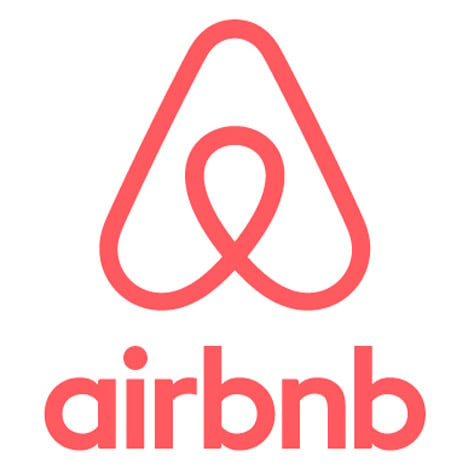
Airbnb is an sanfranciso based american tourist company, which is founded in 2008.
Airbnb is an online service provider that connects the people who want to rent out their homes with the people who are looking for accommodations in specific locales and Airbnb makes the bulk of its revenue by charging a service fee for each booking
Airbnb offers people an easy, relatively stress-free way to earn some income from their property.

The Airbnb data set contains information on listings, hosts, guests, and reservations from cities around the world. The data set includes detailed information such as location, property type, room type, price, availability, ratings, and reviews.

Cons of using this service include not getting what you expected, and, for hosts, renting your place to someone you haven’t had the chance to meet first.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **Problem statement**
* How to deal with all the duplicate and null values?

* Find the mean and median value of all numeric column so get idea where all numeric value lies?

* Are private rooms preferred over other room types?

* How many hotel available 365 days? And top 10 hotels name on the basis of highest availability for the whole year?

* Is there any correlation between all the numerical data?
* Which neighbourhood is preferred over all the neighbourhood?
* which type of room rented most?
* what is the average room price in all room type?
* Who is the bussiest host in the industry?
* What is the most preffered price segment?

# **Import all the related libraries**

In [ ]:
# import all the related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load the Dataset**

In [ ]:
# Load the Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/AlmaBetter/AirBnb_Booking_Analysis/AirBnb_dataset/AirbnbNYC2019.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**

In [ ]:
# check the shape of dataset
df.shape

(48895, 16)

There is 16 column and 48895 rows.

In [ ]:
# Top 5 rows of the data set
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# All the column name which we have
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# numerical infomation of dataset
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.24,10983108.39,2539.00,9471945.00,19677284.00,2.915218e+07,3.648724e+07
host_id,48895.0,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,1.074344e+08,2.743213e+08
latitude,48895.0,40.73,0.05,40.50,40.69,40.72,4.076000e+01,4.091000e+01
longitude,48895.0,-73.95,0.05,-74.24,-73.98,-73.96,-7.394000e+01,-7.371000e+01
price,48895.0,152.72,240.15,0.00,69.00,106.00,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.03,20.51,1.00,1.00,3.00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,23.27,44.55,0.00,1.00,5.00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.37,1.68,0.01,0.19,0.72,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.14,32.95,1.00,1.00,1.00,2.000000e+00,3.270000e+02
availability_365,48895.0,112.78,131.62,0.00,0.00,45.00,2.270000e+02,3.650000e+02


# **Data Cleaning**

In [ ]:
# Check the duplicate value.
df.duplicated().sum()

0

so there is no duplicate value in the dataset.

In [ ]:
# check the null value of the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here we have some null value in Name and host_name but higher null value in last_review and reviews_per_month.

In [ ]:
# make a copy of the data so that original data set did not effective
df1 = df.copy()

In [ ]:
df1.fillna({'last_review' : 'No_review'}, inplace = True)
df1.fillna({'host_name' : 'No_name'}, inplace = True)
df1.fillna({'name':'No Name'}, inplace=True)
df1.fillna(0,inplace = True)

In [ ]:
# check the null value again
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Here now we can see there is no null value in the dataset.

In [ ]:
# The count on all unique value in each columns.
df1.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# drop some useless columns.
df1 = df1.drop(columns=['latitude','longitude'],axis = 1)

In [ ]:
# find the numerial columns of the dataset.
numerical_columns = df1.describe().columns
numerical_columns

Index(['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Visualization**

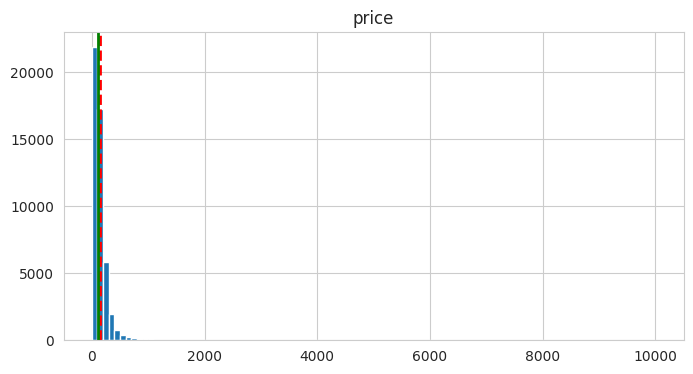

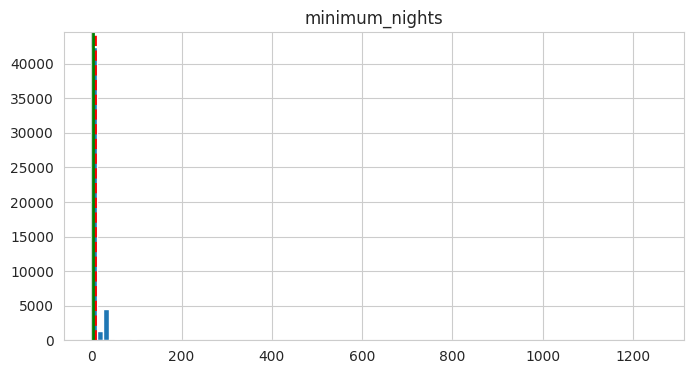

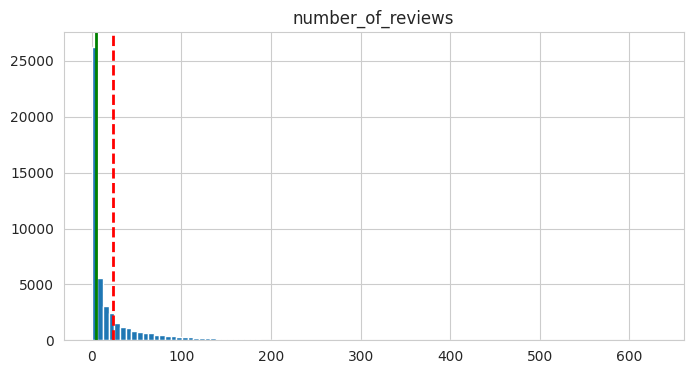

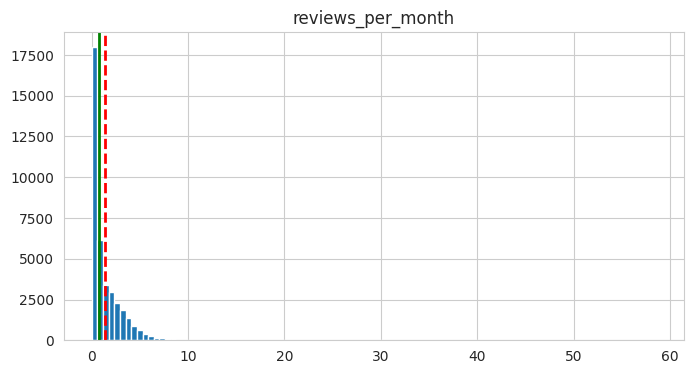

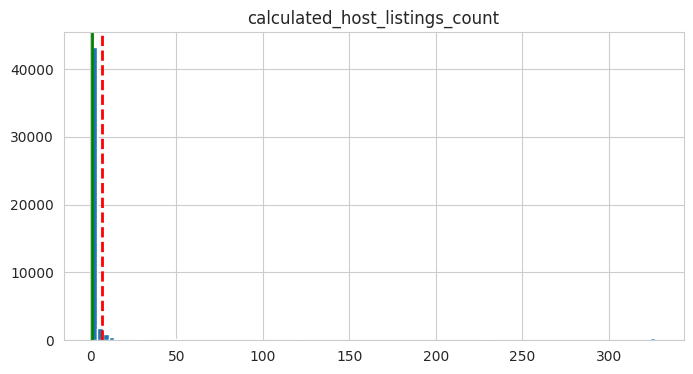

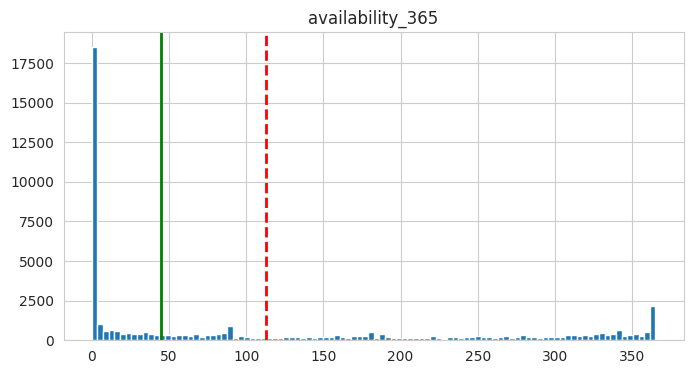

In [ ]:
# visualize the mean and median lines in numerical columns.
for column in numerical_columns[2:]:
  fig = plt.figure(figsize = (8,4))
  ax = fig.gca()
  features = df[column]
  features.hist(bins = 100, ax = ax)
  ax.axvline(features.mean(), color='r', linestyle='--',label = 'mean',linewidth = 2)
  ax.axvline(features.median(), color='g', linestyle='-',label = 'median',linewidth = 2)
  plt.title(column)
plt.show()  

* By see the mean and median value we get the average value and the 50th% value of any numerical value like here price, number if review etc.

In [ ]:
# top 10 avilable hotels in data.
top_10_avialable_hotels = df1.groupby(['host_id','name','neighbourhood','price'])['availability_365'].max().reset_index()
top_10_avialable_hotels.sort_values(by = ['availability_365'],ascending = False).head(10)

,host_id,name,neighbourhood,price,availability_365
8123,4110869,1.5 BATHRM SUNNY SPACIOUS ROOM BY SUBWAY,Harlem,50,365
22394,24979023,Brand new 2 bedroom apartment near yankee stadium,Concourse Village,85,365
44026,214184351,"Cute Clean & Quaint , 40 minutes away from. City",Bushwick,63,365
37939,123506305,Cozy room 5 to 7 minutes from JFK airport.,Jamaica,60,365
25479,34387513,Bright & Spacious,Long Island City,225,365
48216,266792224,WOODSIDE COMFORTABLE ROOM 15 MINUTES FROM THE ...,Woodside,90,365
33639,76104209,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,Upper East Side,225,365
33641,76104209,EAST 60TH STREET STUDIO WITH 2 DOUBLE BEDS,Upper East Side,153,365
33645,76104209,IN MINT CONDITION-1BR&TERRACE-E 44TH/UNITED NA...,Midtown,220,365
1179,299236,Cosy room in a Brooklyn brownstone,Bedford-Stuyvesant,55,365


* These are top 10 avialable hotels.

<ipython-input-108-d75263d48eb4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


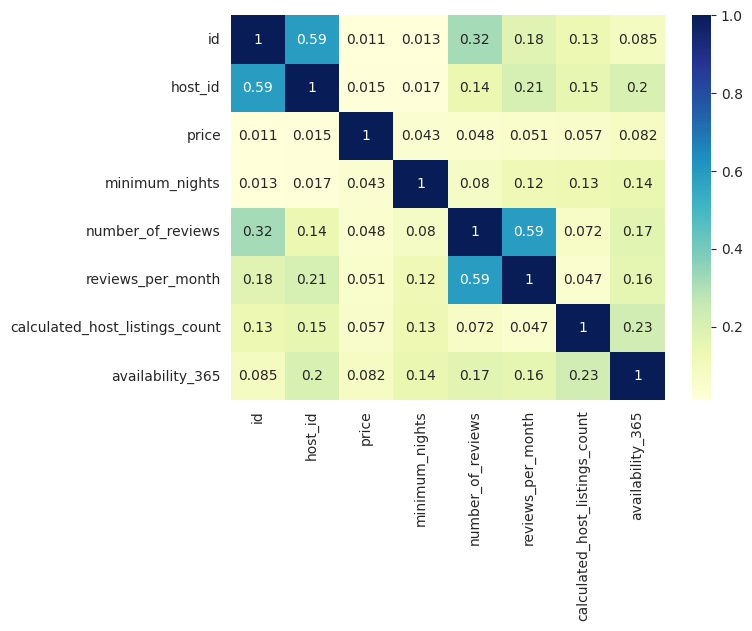

In [ ]:
# check the multicorellation in the dataset
plt.figure(figsize = (7,5))
correlation = df1.corr()
sns.heatmap(abs(correlation), cmap="YlGnBu", annot=True)
plt.show()

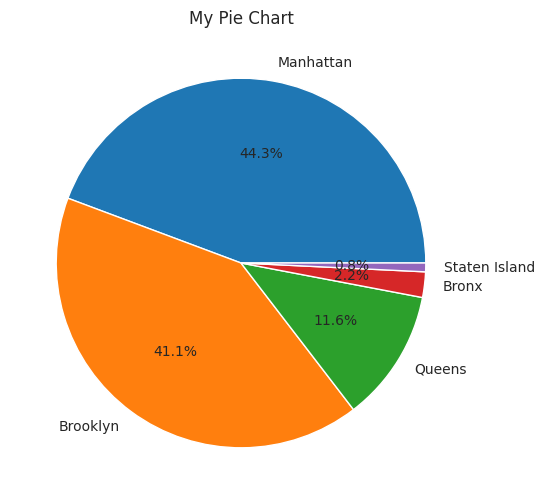

In [ ]:
#pie chart of each neighbourh hood percentage in hotel industry
sns.set_style("whitegrid")
order = df1['neighbourhood_group'].value_counts().reset_index(name = ('count'))
plt.figure(figsize=(6, 6))
plt.pie(order['count'], labels=order['index'], autopct='%1.1f%%')
plt.title('My Pie Chart')
plt.show()

* Here we observe that Manhattan and Brooklyn has above percent market share each.

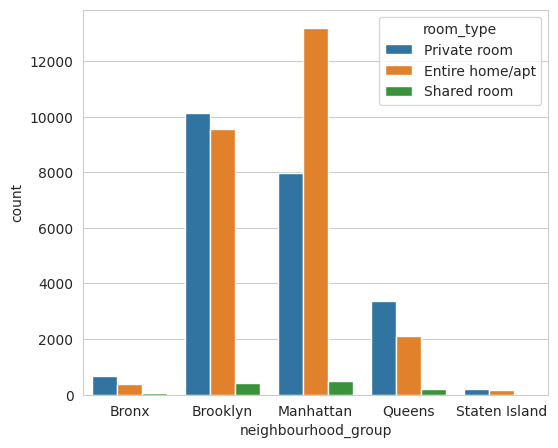

In [ ]:
# visualize room type in each neighbourhood.
plt.figure(figsize=(6,5))
a = df.groupby('neighbourhood_group')['room_type'].value_counts().reset_index(name = 'count')
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=a)
plt.show()

* Listing of all home or apartment is the highest in Manhattan while Brooklyn has private room listing at the highest though entire home or apt listing is not so far behind.

* Shared room are less number in each neighbourhood group

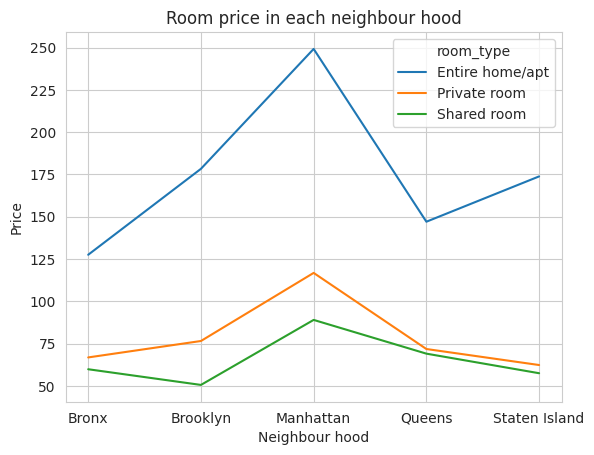

In [ ]:
# mean price of each room type in all neighbourhood group
order =df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
sns.lineplot(x = 'neighbourhood_group',y = 'price',data = order,hue = 'room_type')
plt.title('Room price in each neighbour hood')
plt.xlabel('Neighbour hood')
plt.ylabel('Price')
plt.show()


* Basicly here we can see the entire home and apartment price are high and shared room price is lowest in all neighbourhodd group.

In [ ]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

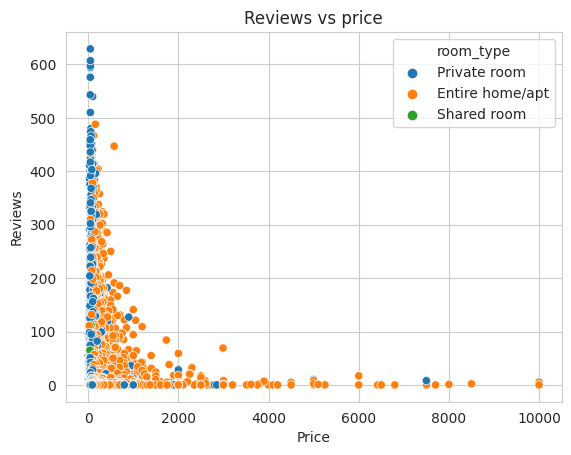

In [ ]:
# visualize the relationship between reviews and price
sns.scatterplot(y='number_of_reviews', x ='price',data = df1,color = 'orange',hue = 'room_type')
plt.title('Reviews vs price')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()

In [ ]:
# top 10 bussiest host
bussiest_host = df.groupby(['host_name','host_id']).agg({'number_of_reviews' : 'size'})
order4 = bussiest_host.reset_index()
order4 = order4.sort_values(by = 'number_of_reviews',ascending = False).head(10)
order4

,host_name,host_id,number_of_reviews
33222,Sonder (NYC),219517861,327
4858,Blueground,107434423,232
18968,Kara,30283594,121
19601,Kazuya,137358866,103
16540,Jeremy & Laura,16098958,96
33221,Sonder,12243051,96
7792,Corporate Housing,61391963,91
19762,Ken,22541573,87
29152,Pranjal,200380610,65
25746,Mike,1475015,52


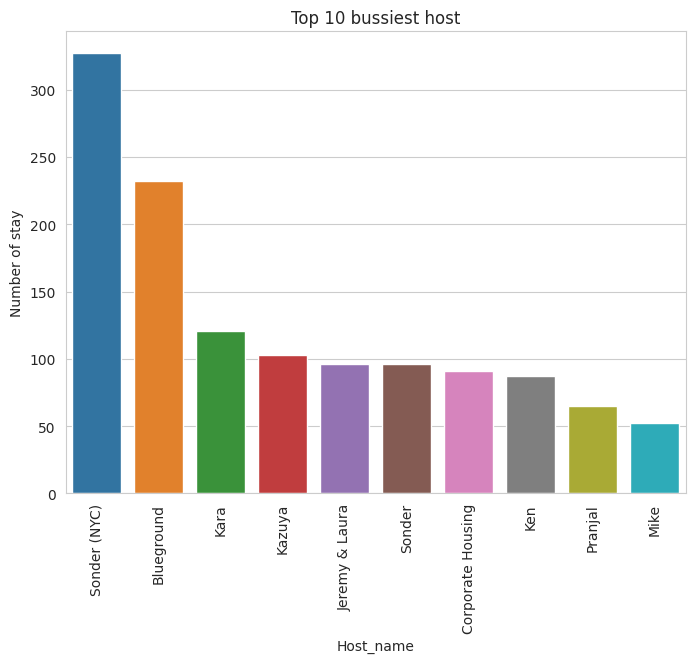

In [ ]:
# visualize the top 10 host name 
plt.figure(figsize = (8,6))
sns.barplot(x = 'host_name',y = 'number_of_reviews', data = order4)
plt.title('Top 10 bussiest host')
plt.xlabel('Host_name')
plt.ylabel('Number of stay')
plt.xticks(rotation = 90 )
plt.show()

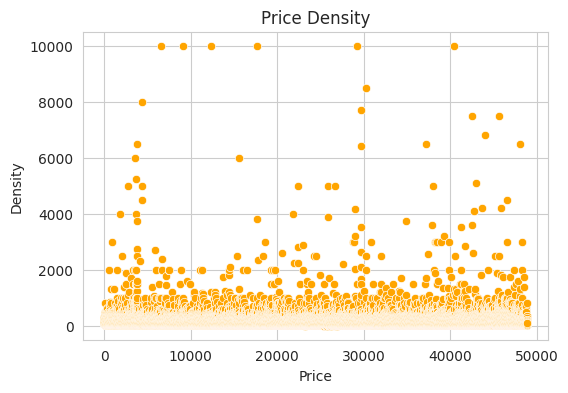

In [ ]:
# check the price density
plt.figure(figsize = (6,4))
sns.scatterplot(data = df1['price'], color = 'orange')
plt.title('Price Density')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# **Conclusion**
* The people prefer to stay in Entire home or Apartment above shared room in each Neighbourhood.
* Most people prefer rented room under 2000.
* Manhatten and Broklyn have above 85% market share.
* Here we can observe there is no rental avilability issue on airbnb.